# Import library

In [12]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# Read data

In [13]:
main_df = pd.read_csv('./sonar.all-data.csv',header=None)
main_df

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,M
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,M
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,M
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,M


# Check balance data and edit label 

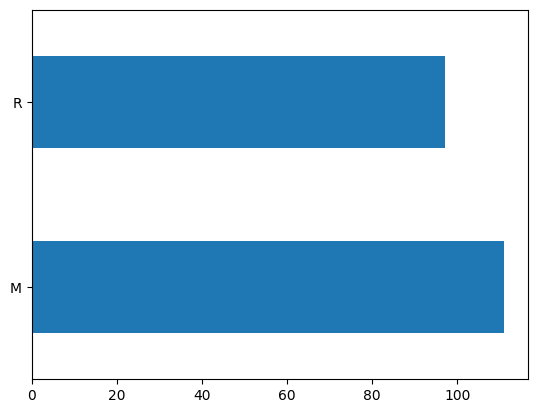

In [14]:

main_df[60].value_counts().plot(kind='barh')
y_df = main_df[60]
targes_label = {'M': 1,'R': -1}
targes_df = [targes_label[item] for item in y_df]

# Get data and split to train and test

In [15]:
inputs_df = main_df.drop(60, axis=1)
inputs_df = main_df.drop(60, axis=1)
x0 = np.ones(( inputs_df.shape[0], 1))
X = np.concatenate((x0, inputs_df), axis = 1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, targes_df, test_size=0.30,random_state=42)
print("X train:\n", X_train)
print("\n X test:\n", X_test)

X train:
 [[1.000e+00 1.021e-01 8.300e-02 ... 2.140e-02 2.270e-02 1.060e-02]
 [1.000e+00 5.990e-02 4.740e-02 ... 1.140e-02 1.120e-02 1.000e-02]
 [1.000e+00 2.010e-02 1.650e-02 ... 1.050e-02 8.200e-03 3.600e-03]
 ...
 [1.000e+00 2.600e-02 1.920e-02 ... 8.000e-04 4.400e-03 7.700e-03]
 [1.000e+00 3.940e-02 4.200e-02 ... 6.800e-03 5.300e-03 8.700e-03]
 [1.000e+00 5.870e-02 1.210e-01 ... 1.010e-02 2.280e-02 1.240e-02]]

 X test:
 [[1.     0.0305 0.0363 ... 0.0042 0.0055 0.0021]
 [1.     0.0298 0.0615 ... 0.0049 0.02   0.0073]
 [1.     0.0139 0.0222 ... 0.0059 0.0039 0.0048]
 ...
 [1.     0.0152 0.0102 ... 0.0011 0.0034 0.0033]
 [1.     0.0209 0.0261 ... 0.0288 0.0129 0.0023]
 [1.     0.0414 0.0436 ... 0.0077 0.0246 0.0198]]


# Build function

In [16]:
# Define h_w(x):= W^T.x + w_0 = \bar{W}^T . \bar{x}
def h(w, x):
    return np.sign(np.dot(w.T, x))

#Stop condition
def has_converged(X, y, w):
    return np.array_equal(h(w, X), y) #True if h(w, X) == y else False

# Find separate line

In [17]:
def perceptron(X, y, w_init):
    w = [w_init]
    N = X.shape[1]
    mis_points = [] # set of miss position points
    while True:
        # mix data
        mix_id = np.random.permutation(N)
        for i in range(N):
            xi = X[:, mix_id[i]].reshape(61, 1)
            yi = y[0, mix_id[i]]
            if h(w[-1], xi)[0] != yi:
                mis_points.append(mix_id[i])
                w_new = w[-1] + yi*xi
                w.append(w_new)
        if has_converged(X, y, w[-1]):
            break
    return (w, mis_points)

# Print w

In [18]:
d = X_train.T.shape[0]
w_init = np.random.randn(d, 1)
(w, m) = perceptron(X_train.T, np.array([y_train]), w_init)
print(w[-1].T)

[[-3.99571446e+01  1.49114365e+02 -4.61806471e+01 -1.52112356e+02
   1.51178273e+02  4.21464068e+01  3.00141765e+01 -6.65940708e+01
  -2.94658021e+01  5.26153990e+01 -5.62658895e+01  8.54715657e+01
   1.25035469e+01 -6.98792430e+00 -8.80082703e+00  9.39062593e+00
  -2.64556884e+01 -3.14280003e+01  4.10393728e+01 -1.74277039e+01
   5.21621184e+01 -7.48624012e+01  7.48332625e+01 -5.56319084e+01
   6.43531664e+01 -8.98090222e+00 -1.13323407e+01 -1.52381369e-01
   1.68077899e+01 -2.77077022e+01  7.23262669e+01 -1.02989780e+02
   3.29641550e+01  4.19378256e+01 -5.03790245e+01  3.72260225e+01
  -6.64858396e+01  1.63054388e+01 -1.10643927e+01  5.49292617e+01
  -5.08608878e+01 -8.03322158e+00 -2.80507576e+01  6.24908120e+01
  -3.16599144e+00 -7.25458134e+00  5.25676772e+01 -4.40299977e+01
   1.40695075e+02  1.47355210e+02 -2.00153637e+02  9.55917202e+01
   6.83046744e+01  2.15781591e+01  1.17958257e+02 -5.37025101e+00
  -6.49144819e+01 -8.46081654e+01  4.52990857e+01  1.08342546e+02
   6.27524

# Predict and show accuracy

In [19]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
y_train = np.array([y_train])
y_pre = h(w[-1], X_test.T).T
print("Accuracy score:", accuracy_score(y_test, y_pre))
print("Precision score:", precision_score(y_test, y_pre))
print("Recall score:", recall_score(y_test, y_pre))

Accuracy score: 0.7777777777777778
Precision score: 0.7837837837837838
Recall score: 0.8285714285714286


# reduce dimension

In [20]:
X = StandardScaler().fit_transform(X)
pca = PCA(n_components= 2)
result = pca.fit_transform(X)

# plot

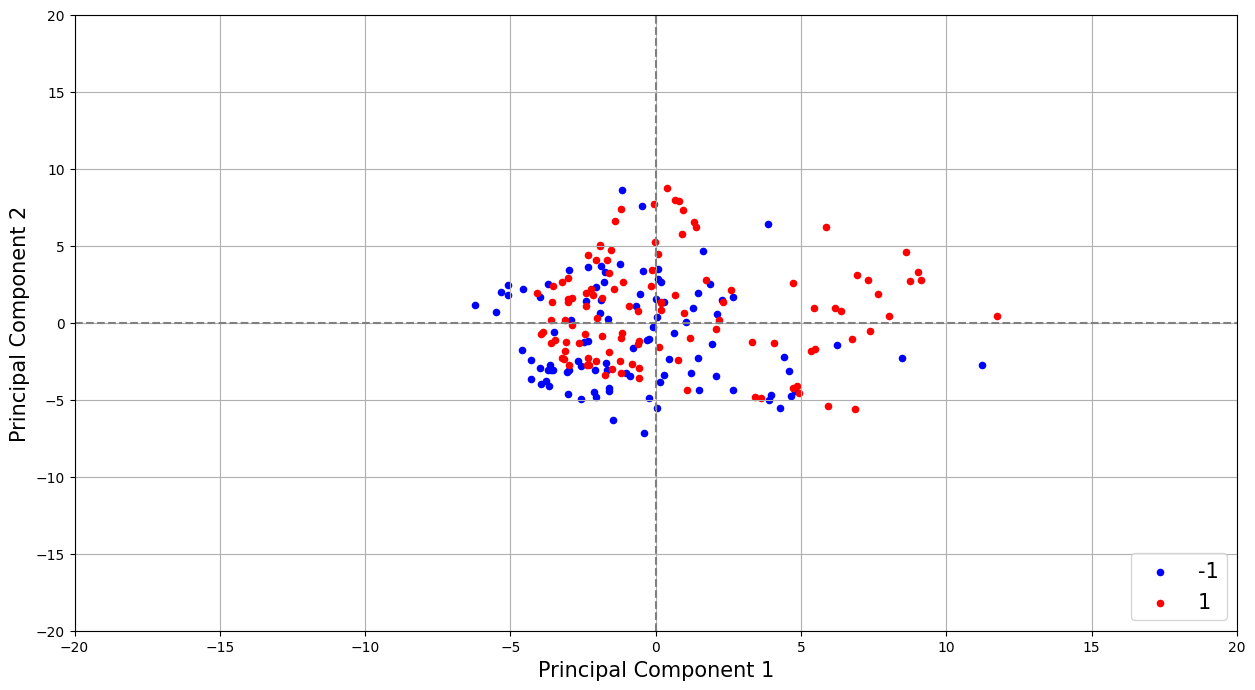

In [21]:
def plot_scatter(pc1, pc2):
    fig, ax = plt.subplots(figsize=(15, 8))
    sonar = list(set(targes_df))
    sonar_color = ["r","b","g"]
    for i, spec in enumerate(targes_df):
        plt.scatter(pc1[i], pc2[i], label = spec, s = 20,
        c=sonar_color[sonar.index(spec)])
        # ax.annotate(str(i+1), (pc1[i],pc2[i]))

    from collections import OrderedDict
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = OrderedDict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys(), prop={'size': 15}, loc=4)
    ax.set_xlabel('Principal Component 1', fontsize = 15)
    ax.set_ylabel('Principal Component 2', fontsize = 15)
    ax.axhline(y=0, color="grey", linestyle="--")
    ax.axvline(x=0, color="grey", linestyle="--")
    plt.grid()
    plt.axis([-20, 20, -20, 20])
    plt.show()
plot_scatter(result[:,0], result[:,1])

# logistic regression

In [22]:
logr = LogisticRegression(penalty="none")
logr.fit(X_train, y_train.T)

y_pre = logr.predict(X_test)
print("accuracy score:", accuracy_score(y_pre, y_test))
print("Precision score:", precision_score(y_test, y_pre))
print("Recall score:", recall_score(y_test, y_pre))

accuracy score: 0.7777777777777778
Precision score: 0.8
Recall score: 0.8


C:\Users\LENOVO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\LENOVO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
